# Popular Data Science Questions

### Intro
In this guided project, we will analyze data from the Stack Exchange Data Science database to identify the most popular topics in data science questions. At the end of the project, we will recommend types of questions to ask based on our findings.

**Scenario:** You're working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms like Dataquest.

**Objective:** What is it that people want to learn about in data science?

**Data From:** [Data Science Stack Exchange](https://datascience.stackexchange.com/)

### Stack Exchange
What is Stack Exchange? To use [their own words](https://stackexchange.com/about), 

> Stack Overflow and the Stack Exchange network help people find the answers they need, when they need them. Comprising 173 Q&A communities, including Stack Overflow, over 100 million people visit every month to ask questions, learn, and share technical knowledge. Our products and tools empower people to find what they need to develop technology at work or at home. These products include, Stack Overflow for Teams, Stack Overflow Advertising, and Stack Overflow Talent. ("About Stack Exchange")

### Data
After sifting through the [various datasets](https://data.stackexchange.com/datascience/query/new) that Stack Exchange has made available to the public, we selected the 'Posts' dataset for our project. We also filtered the 'Posts' dataset to include only the entries from 2019 to the present (March 14, 2025). Let's begin in the code below by importing our libraries, reading in our data, and exploring it.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
posts = pd.read_csv("posts_2019_present.csv")

In [74]:
posts

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,43370,1,2019-01-01 10:06:03,2,40,<classification>,0,NaN
1,43381,1,2019-01-01 19:16:04,1,409,<machine-learning><homework>,0,NaN
2,43393,1,2019-01-02 09:20:02,1,28,<gaussian>,0,NaN
3,43396,1,2019-01-02 12:54:11,1,34,<deep-learning><nlp><lstm><text-generation>,0,NaN
4,43400,1,2019-01-02 17:13:28,1,237,<predictive-modeling><labels>,0,NaN
...,...,...,...,...,...,...,...,...
24541,75167,1,2020-05-31 10:09:52,13,4493,<correlation>,8,NaN
24542,48531,1,2019-04-03 15:16:24,46,8351,<data-wrangling>,9,NaN
24543,63101,1,2019-11-13 16:14:23,28,65500,<jupyter>,10,NaN
24544,69978,1,2020-03-20 04:23:51,14,5114,<machine-learning><data-cleaning><categorical-...,10,NaN


In [75]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24546 entries, 0 to 24545
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             24546 non-null  int64  
 1   PostTypeId     24546 non-null  int64  
 2   CreationDate   24546 non-null  object 
 3   Score          24546 non-null  int64  
 4   ViewCount      24546 non-null  int64  
 5   Tags           24546 non-null  object 
 6   AnswerCount    24546 non-null  int64  
 7   FavoriteCount  0 non-null      float64
dtypes: float64(1), int64(5), object(2)
memory usage: 1.5+ MB


From the results above, we can see that the `FavoriteCount` column has all missing values. The `CreationDate` column could be a different data type, and the `Tags` column could also be organized a bit differently. In the code below, we will fill in the null values, convert the `CreationDate` to its proper data type, and reformat the `Tags` column.

### Data Cleaning and Preparation

In [76]:
# reformatting the Tags column
def clean(x):
    x = str(x)
    x = x.replace("><", ",")
    x = x.replace("<", "")
    x = x.replace(">", "")
    return x

posts['Tags'] = posts['Tags'].apply(clean)
posts['Tags'] = posts['Tags'].replace('nan', '0')

# correcting the null values
posts = posts.fillna(0)

# converting the CreationDate column to the proper data type
posts['CreationDate'] = pd.to_datetime(posts['CreationDate'])

# reordering the cleaned dataset
posts = posts.sort_values(by='CreationDate', ascending=True)
posts = posts.reset_index(drop=True)

In [77]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24546 entries, 0 to 24545
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             24546 non-null  int64         
 1   PostTypeId     24546 non-null  int64         
 2   CreationDate   24546 non-null  datetime64[ns]
 3   Score          24546 non-null  int64         
 4   ViewCount      24546 non-null  int64         
 5   Tags           24546 non-null  object        
 6   AnswerCount    24546 non-null  int64         
 7   FavoriteCount  24546 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 1.5+ MB


In [78]:
posts

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,43363,1,2019-01-01 03:53:02,0,79,"machine-learning,nlp",1,0.0
1,43366,1,2019-01-01 06:02:07,3,209,"deep-learning,image-classification,convolution...",1,0.0
2,43367,1,2019-01-01 06:16:26,0,44,"scikit-learn,tensorflow,scipy",1,0.0
3,43370,1,2019-01-01 10:06:03,2,40,classification,0,0.0
4,43374,1,2019-01-01 13:18:02,3,52,"deep-learning,time-series,cnn,convolution",1,0.0
...,...,...,...,...,...,...,...,...
24541,131533,1,2025-03-08 02:11:18,0,10,"regression,statistics,categorical-data",0,0.0
24542,131534,1,2025-03-08 05:37:48,-1,7,text,0,0.0
24543,131535,1,2025-03-08 08:55:31,-1,23,data-analysis,0,0.0
24544,131536,1,2025-03-08 22:00:24,0,2,"machine-learning,r,clustering,xgboost,glm",0,0.0


Now that our dataset is ready for analysis, we will focus on determining the most popular question tags. In the next section of code, we will count how many times each tag occurs and how many times each tag has been viewed.

### Top Counts and Top Views

In [79]:
# Empty dictionary
unique_tags = {}

# for loop counting each occurance of each tag
for x in posts['Tags']:
    if x != '0':  
        if ',' in x:
            split_tag = x.split(',')
            for t in split_tag:
                if t in unique_tags:
                    unique_tags[t] += 1
                else:
                    unique_tags[t] = 1
        else:
            if x in unique_tags:
               unique_tags[x] += 1
            else:
               unique_tags[x] = 1

# converting the dicitonary to a DataFrame and adding an empty column for the View count
unique_tags = pd.DataFrame(list(unique_tags.items()), columns=['Tag', 'Count'])
unique_tags['Views'] = 0.0

In [80]:
unique_tags

,Tag,Count,Views
0,machine-learning,7317,0.0
1,nlp,2017,0.0
2,deep-learning,3334,0.0
3,image-classification,504,0.0
4,convolutional-neural-network,413,0.0
...,...,...,...
682,seq2seq,1,0.0
683,diagram,1,0.0
684,quantization,3,0.0
685,ollama,1,0.0


In the code above, we have separated each tag and counted how many times each tag occurs, but the values in the 'Views' column are incorrect. In the code below, we will calculate the exact number of views for each tag.

In [81]:
# for loop counting the number of views for each tag
for index, row in posts.iterrows():
    tag = row['Tags']
    views = row['ViewCount']
    if tag != '0':  
        if ',' in tag:
            split_tag = tag.split(',')
            for x in split_tag:
                unique_tags.loc[unique_tags['Tag'] == x, 'Views'] += views
        else:
            unique_tags.loc[unique_tags['Tag'] == x, 'Views'] += views

In [82]:
unique_tags

,Tag,Count,Views
0,machine-learning,7317,7365688.0
1,nlp,2017,2159316.0
2,deep-learning,3334,3967349.0
3,image-classification,504,565632.0
4,convolutional-neural-network,413,428888.0
...,...,...,...
682,seq2seq,1,10.0
683,diagram,1,8.0
684,quantization,3,38.0
685,ollama,1,131.0


We now have a dataframe with all the unique tags, along with the number of views and counts for each one. Now, it's a matter of selecting the top, most popular tags. To do this, we will split this dataset into two parts and find the top tags in the 'Count' column and the 'Views' column. Our first step in this process is to examine the details of the 'Count' column.

In [83]:
unique_tags['Count'].describe()

count     687.000000
mean      113.024745
std       418.635400
min         1.000000
25%         7.000000
50%        21.000000
75%        65.000000
max      7317.000000
Name: Count, dtype: float64

Because we are interested in the most popular Data Science questions, we will visualize all the tags that are equal to or above the average number of counts. If we didn't do this, there would be so many data points that it would be hard to view them all and identify the leaders.

In [84]:
# assigning the average number of counts to a variable
count_mean = unique_tags['Count'].mean()

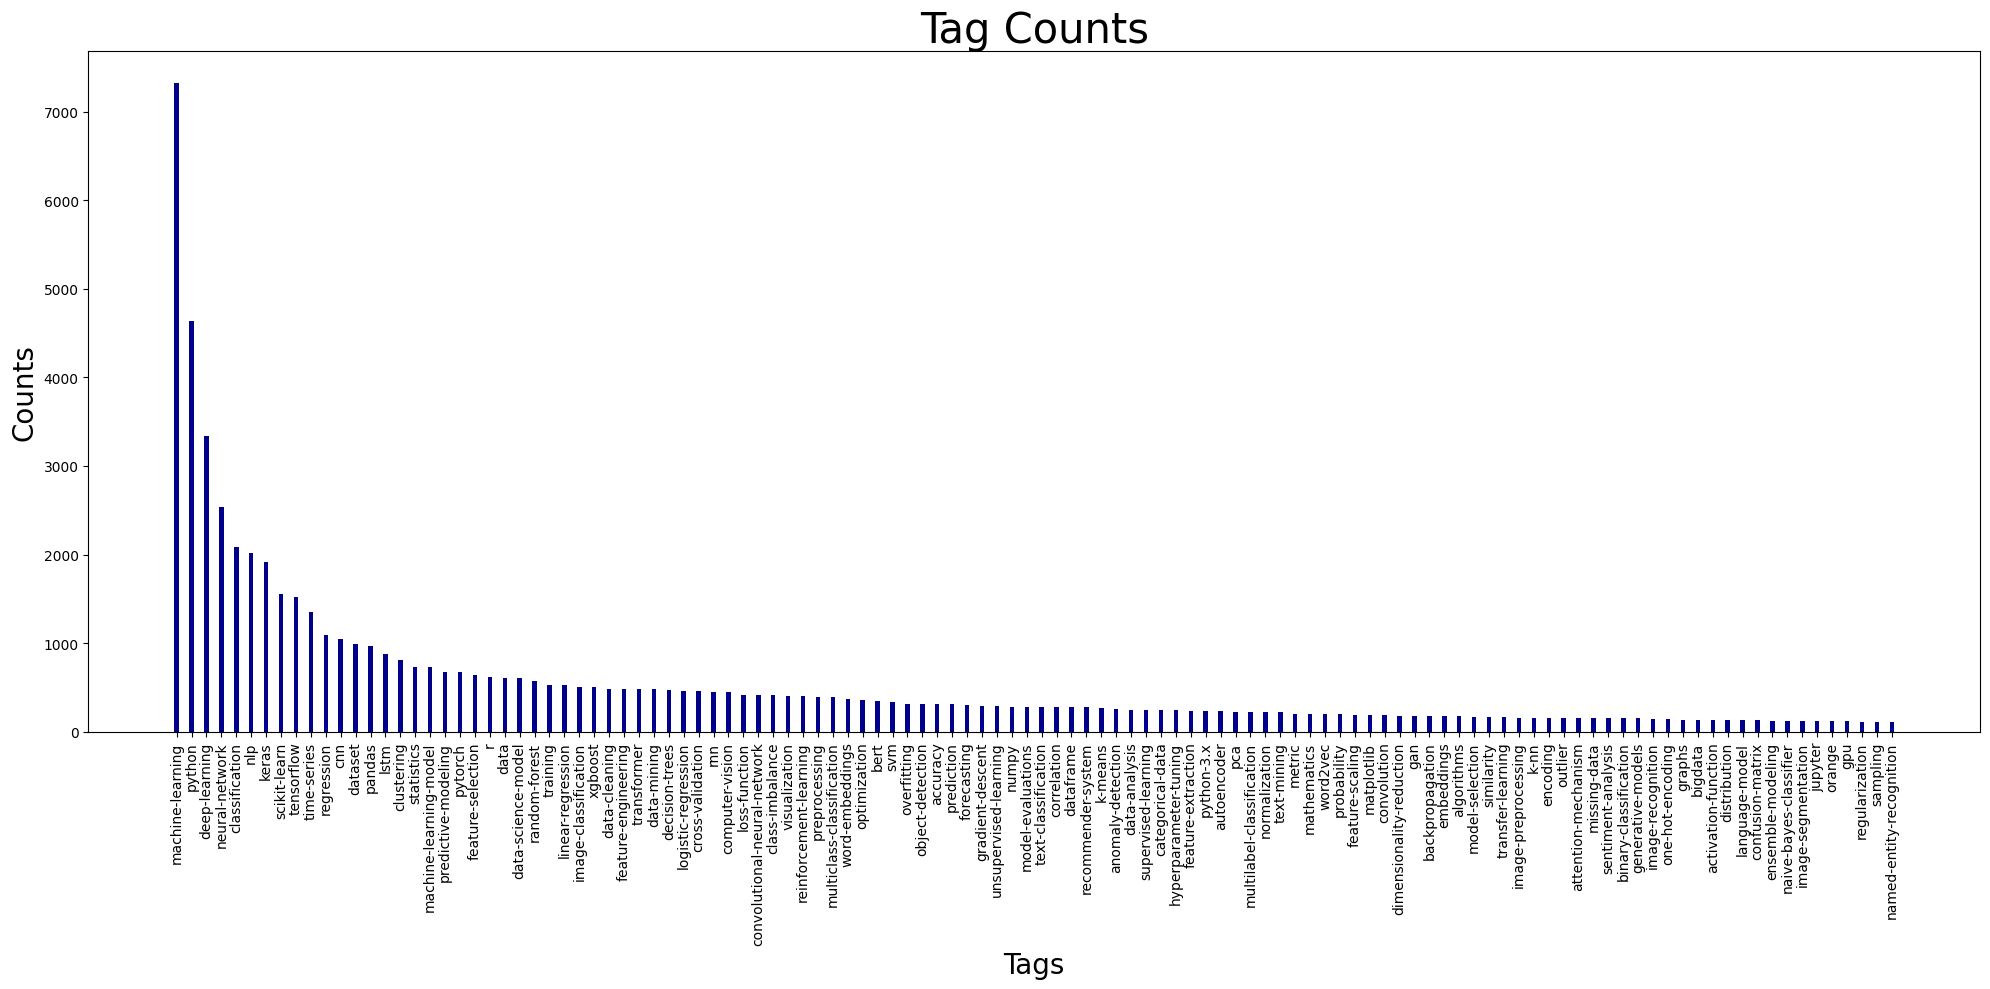

In [85]:
# creating a dataframe containing only the tags that are euqal to, or above the average
top_count = unique_tags.copy()
top_count = top_count[top_count['Count'] >= count_mean]
top_count = top_count.sort_values(by='Count', ascending=False)
top_count = top_count.reset_index(drop=True)

# visualizing the top_count dataframe
plt.figure(figsize=(20, 10))
plt.bar(top_count['Tag'], top_count['Count'], color='darkblue', width=0.3)
plt.title('Tag Counts', fontsize=30, color='black')
plt.xlabel('Tags', fontsize=20, color='black')
plt.ylabel('Counts', fontsize=20, color='black') 
plt.xticks(rotation=90, color='black')
plt.tight_layout()
plt.show()

In examining the graph above, we can see that 'machine-learning' stands out prominently above the others, followed by 'python' and 'deep-learning.' We will keep these tags in mind as we follow the same procedure for the top tags in the 'Views' column.

In [86]:
unique_tags['Views'].describe()

count    6.870000e+02
mean     1.363326e+05
std      5.515289e+05
min      0.000000e+00
25%      2.832000e+03
50%      1.317500e+04
75%      7.722050e+04
max      8.303400e+06
Name: Views, dtype: float64

In [87]:
# assigning the average number of views to a variable
view_mean = unique_tags['Views'].mean()

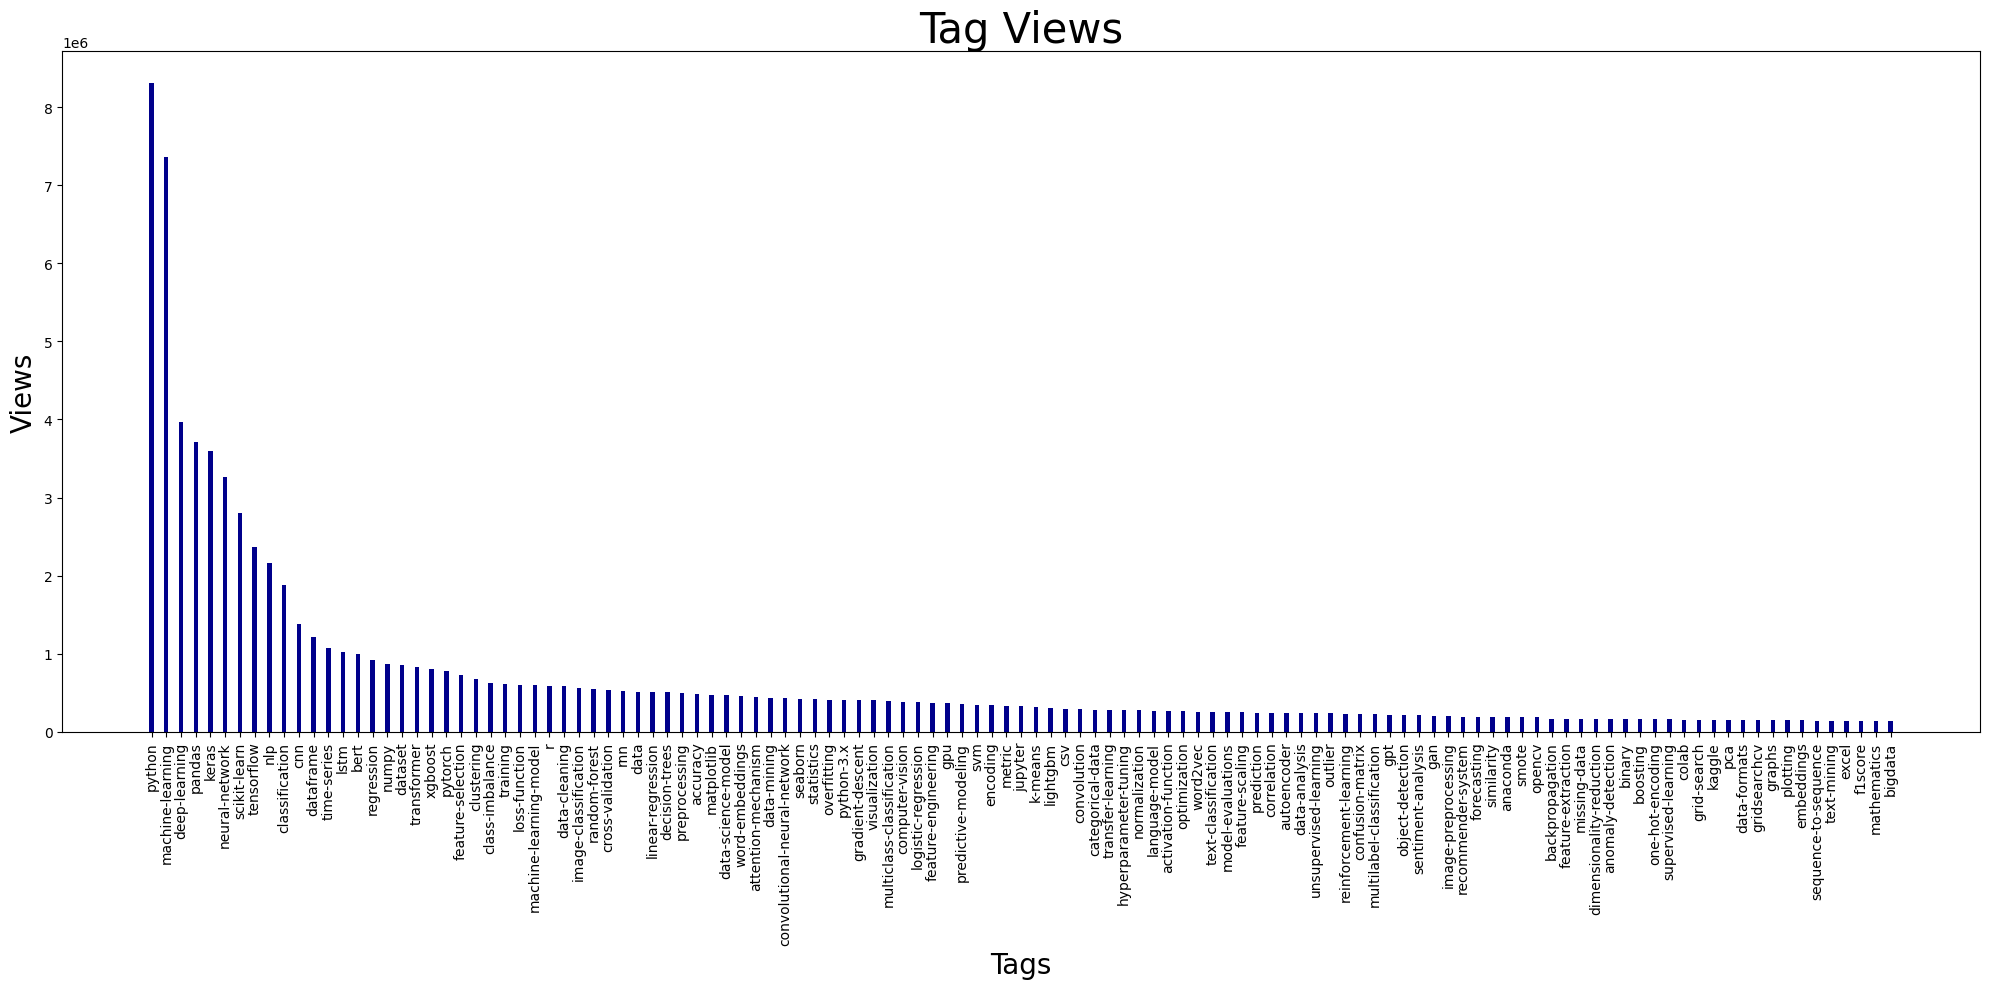

In [88]:
# creating a dataframe containing only the tags that are euqal to, or above the average
top_views = unique_tags.copy()
top_views = top_views[top_views['Views'] >= view_mean]
top_views = top_views.sort_values(by='Views', ascending=False)
top_views = top_views.reset_index(drop=True)

# visualizing the top_count dataframe
plt.figure(figsize=(20, 10))
plt.bar(top_views['Tag'], top_views['Views'], color='darkblue', width=0.3)
plt.title('Tag Views', fontsize=30, color='black')
plt.xlabel('Tags', fontsize=20, color='black')
plt.ylabel('Views', fontsize=20, color='black') 
plt.xticks(rotation=90, color='black')
plt.tight_layout()
plt.show()

It's always encouraging when we see similar patterns in related graphs, as we do here in the leading Views graph above. Similar to the previous Counts graph, we have the same three leading tags: 'python,' 'machine-learning,' and 'deep-learning.' Although they are in a different order, with 'python' coming before 'machine-learning,' these three tags have certainly earned their places on the popular suspects list.

Next, we will take a closer look at the top 20 tags in both sections, Counts and Views. We want to know which exact tags have made their way to the top and if there are any similarities or differences between the two sections.

In [89]:
# ensuring the top_count dataframe is in the correct order, from highest to lowest
top_count = top_count.sort_values(by='Count', ascending=False)
top_count = top_count.reset_index(drop=True)

# selecting the 20 highest tags, based on the number of counts for each tag
top_count = top_count.head(20)

In [90]:
top_count[['Tag', 'Count']]

,Tag,Count
0,machine-learning,7317
1,python,4633
2,deep-learning,3334
3,neural-network,2540
4,classification,2089
5,nlp,2017
6,keras,1911
7,scikit-learn,1560
8,tensorflow,1525
9,time-series,1349


In [91]:
top_count.describe()

,Count,Views
count,20.000000,2.000000e+01
mean,1844.100000,2.374933e+06
std,1635.913937,2.206963e+06
min,675.000000,3.604090e+05
25%,858.500000,8.350285e+05
50%,1219.500000,1.630152e+06
75%,2035.000000,3.342083e+06
max,7317.000000,8.303400e+06


In [92]:
# ensuring the top_views dataframe is in the correct order, from highest to lowest
top_views = top_views.sort_values(by='Views', ascending=False)
top_views = top_views.reset_index(drop=True)

# selecting the 20 highest tags, based on the number of views for each tag
top_views = top_views.head(20)

In [93]:
top_views[['Tag', 'Views']]

,Tag,Views
0,python,8303400.0
1,machine-learning,7365688.0
2,deep-learning,3967349.0
3,pandas,3713188.0
4,keras,3590329.0
5,neural-network,3259334.0
6,scikit-learn,2807616.0
7,tensorflow,2370494.0
8,nlp,2159316.0
9,classification,1878211.0


In [94]:
top_views.describe()

,Count,Views
count,20.000000,2.000000e+01
mean,1757.350000,2.469502e+06
std,1704.673245,2.130335e+06
min,276.000000,8.069090e+05
25%,780.750000,9.751605e+05
50%,1219.500000,1.630152e+06
75%,2035.000000,3.342083e+06
max,7317.000000,8.303400e+06


From the above inspections, we can see that the Views range much higher than the Counts and that there are some tags that appear in each column but do not appear in the other. To confirm these observations and to continue our investigation, we will generate a visualization below comparing our two lists.

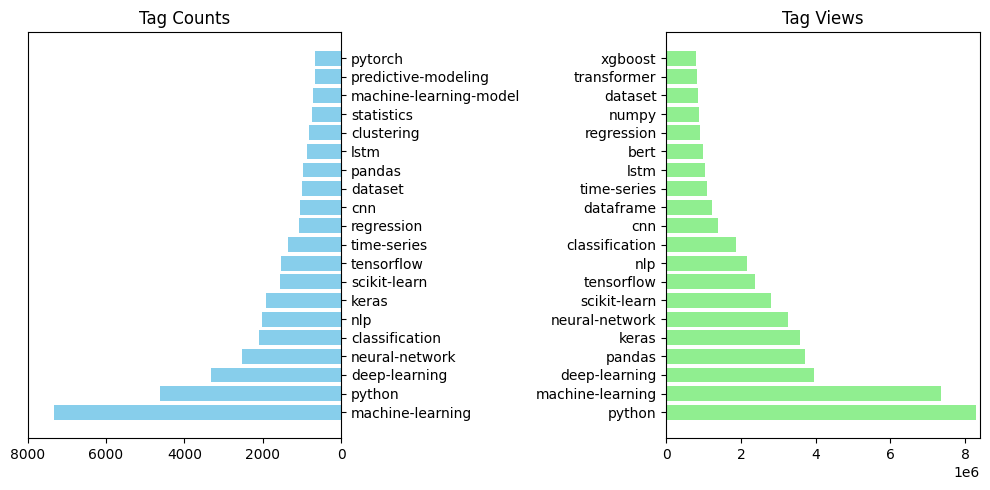

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for the top count tags
ax1.barh(top_count['Tag'], top_count['Count'], color='skyblue')
ax1.set_title("Tag Counts")
ax1.set_xlim(0, 8000)
ax1.invert_xaxis()
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")

# Bar plot for the top view tags
ax2.barh(top_views['Tag'], top_views['Views'], color='lightgreen')
ax2.set_title("Tag Views")
ax2.set_xlim(0, 8400000)

plt.tight_layout()

plt.show()

Our initial observations are confirmed in the graph above. The values in the Views column do indeed range much higher than the values in the Counts column. There are many of the same tags in each list, but, as we mentioned earlier, there are certain tags in each list that are not found in the other list. This is all valuable information as we continue to prepare for our final recommendation.

Next, we will combine our two halves into one dataframe so that we have all our top tags in one convenient place.

### Top Tags

In [96]:
# creating the top_tags dataframe
top_tags = pd.DataFrame()
top_tags = pd.concat([top_count, top_views], axis=0, ignore_index=True)
top_tags = top_tags.drop_duplicates()
top_tags = top_tags.sort_values(by='Count', ascending=False)
top_tags = top_tags.reset_index(drop=True)

In [97]:
top_tags

,Tag,Count,Views
0,machine-learning,7317,7365688.0
1,python,4633,8303400.0
2,deep-learning,3334,3967349.0
3,neural-network,2540,3259334.0
4,classification,2089,1878211.0
5,nlp,2017,2159316.0
6,keras,1911,3590329.0
7,scikit-learn,1560,2807616.0
8,tensorflow,1525,2370494.0
9,time-series,1349,1076925.0


With our tags all in one place now, we will visualize them to see exactly how the views and counts of each tag compare with each other.

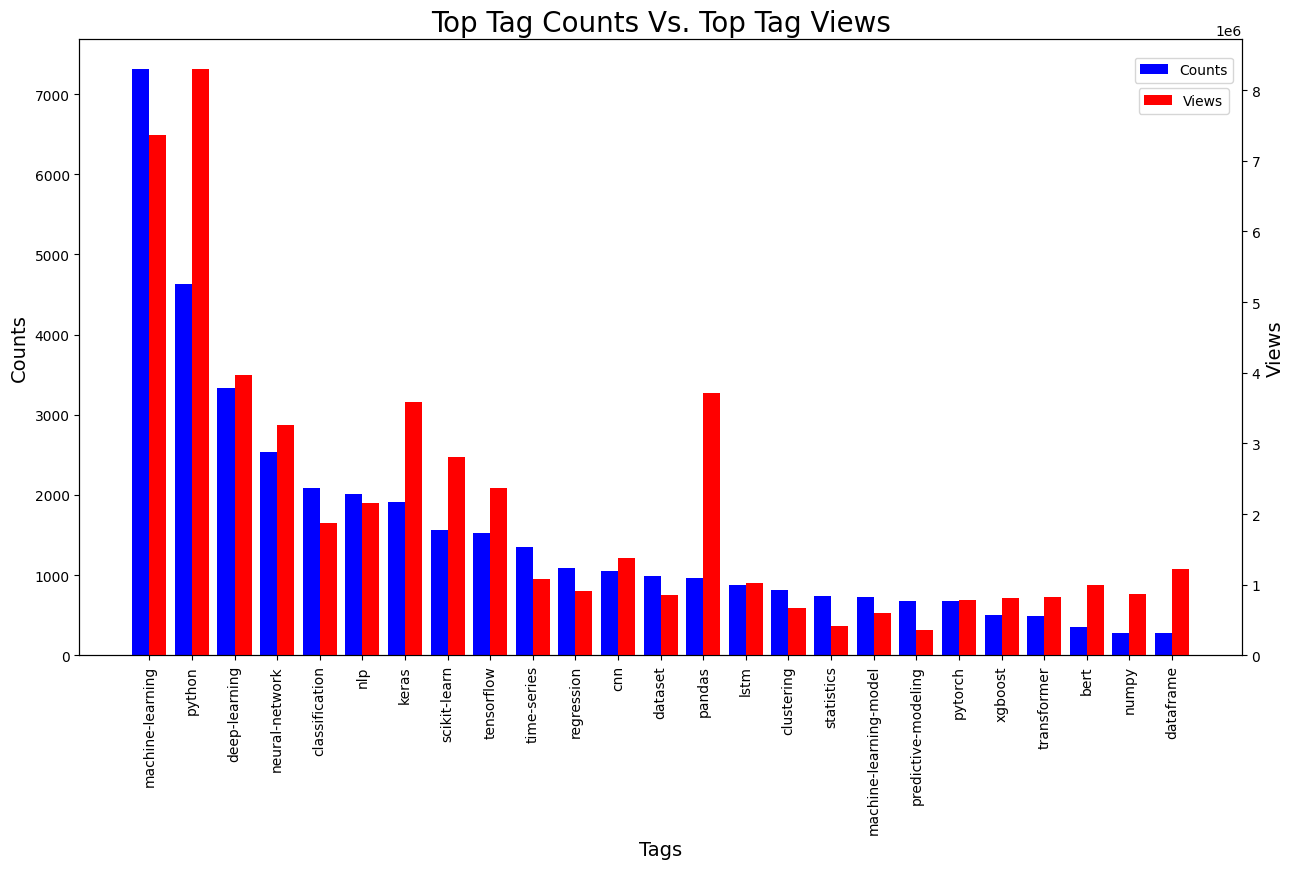

In [98]:
# assign data for visualization
x = top_tags['Tag']
y1 = top_tags['Count']
y2 = top_tags['Views']

# variable for x-ticks
X_axis = np.arange(len(x)) 

# Create a figure and axis
plt.figure(figsize=(15, 8))

ax1 = plt.gca()  # Get the current axis

# Add title and labels
plt.title('Top Tag Counts Vs. Top Tag Views', fontsize=20)
ax1.set_xlabel('Tags', fontsize=14)
ax1.set_ylabel('Counts', fontsize=14)

# Plot the first bar graph on the first y-axis
ax1.bar(X_axis - 0.2, y1, 0.4, label = 'Counts', color='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second bar graph on the second y-axis
ax2.bar(X_axis + 0.2, y2, 0.4, label = 'Views', color='red') 
ax2.set_ylabel('Views', fontsize=14)

# Set x-ticks and rotate labels
ax1.set_xticks(X_axis)  
ax1.set_xticklabels(x, rotation=90)  

# Add legend to both axis
ax1.legend(loc='center', bbox_to_anchor=(0.95, 0.95))
ax2.legend(loc='center', bbox_to_anchor=(0.95, 0.9))

plt.show()

### Just a Phase? - Pt 1
Now that we have visualized our top 24 tags above, we want to know what domain all of these tags belong to. In other words, what do they all have in common, or what are they all related to? Using the [tag discriptions](https://datascience.stackexchange.com/tags) on the Data Science Stack Exchange site, we notice that all the top tags have been paired or associated with 'machine-learning' at one time or another. Because of this, we are starting to lean towards recommending machine learning as the most popular Data Science question topic. However, before we give our final recommendation, we need to ensure that the popularity of machine learning isn't just a fad or phase that is occurring at the time of this project. Perhaps there has been a sudden increase in machine learning questions in the last month that is causing these numbers to be the way they are.

To check this, we will first create a dataframe that filters our original dataset to contain only the rows that have at least one of the top tags in each row of the 'Tags' column.

In [99]:
# creating the machine learning domain dataframe
ml = posts[posts['Tags'] != '0']

In [100]:
# filtering the dataframe to contain only the rows that are in the machine learning domain
rows_to_keep = []
for index, row in ml.iterrows():
    for top_tag in top_tags['Tag']:
        if top_tag in row['Tags']:
            rows_to_keep.append(index)

ml = ml.loc[rows_to_keep]        

In [101]:
ml

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,43363,1,2019-01-01 03:53:02,0,79,"machine-learning,nlp",1,0.0
0,43363,1,2019-01-01 03:53:02,0,79,"machine-learning,nlp",1,0.0
1,43366,1,2019-01-01 06:02:07,3,209,"deep-learning,image-classification,convolution...",1,0.0
1,43366,1,2019-01-01 06:02:07,3,209,"deep-learning,image-classification,convolution...",1,0.0
1,43366,1,2019-01-01 06:02:07,3,209,"deep-learning,image-classification,convolution...",1,0.0
...,...,...,...,...,...,...,...,...
24541,131533,1,2025-03-08 02:11:18,0,10,"regression,statistics,categorical-data",0,0.0
24544,131536,1,2025-03-08 22:00:24,0,2,"machine-learning,r,clustering,xgboost,glm",0,0.0
24544,131536,1,2025-03-08 22:00:24,0,2,"machine-learning,r,clustering,xgboost,glm",0,0.0
24544,131536,1,2025-03-08 22:00:24,0,2,"machine-learning,r,clustering,xgboost,glm",0,0.0


In [102]:
# Selecting the specific columns needed for analysis
ml = ml[['Id', 'CreationDate', 'Tags']]
ml = ml.drop_duplicates()

In [103]:
ml

,Id,CreationDate,Tags
0,43363,2019-01-01 03:53:02,"machine-learning,nlp"
1,43366,2019-01-01 06:02:07,"deep-learning,image-classification,convolution..."
2,43367,2019-01-01 06:16:26,"scikit-learn,tensorflow,scipy"
3,43370,2019-01-01 10:06:03,classification
4,43374,2019-01-01 13:18:02,"deep-learning,time-series,cnn,convolution"
...,...,...,...
24539,131530,2025-03-07 12:41:07,"python,monte-carlo,julia,mcmc"
24540,131532,2025-03-07 15:24:28,"machine-learning,gradient-descent,mini-batch-g..."
24541,131533,2025-03-08 02:11:18,"regression,statistics,categorical-data"
24544,131536,2025-03-08 22:00:24,"machine-learning,r,clustering,xgboost,glm"


Now, we will split the 'ml' (machine-learning) dataframe into periods of one year. We will find the total number of machine learning questions per period and then visualize the changes. This will help us ensure that the popularity of machine learning questions isn't just a phase.

In [104]:
# Creating one year periods
total_2019 = ml[(ml['CreationDate'] >= '2019-01-01') & (ml['CreationDate'] < '2020-01-01')]

total_2020 = ml[(ml['CreationDate'] >= '2020-01-01') & (ml['CreationDate'] < '2021-01-01')]

total_2021 = ml[(ml['CreationDate'] >= '2021-01-01') & (ml['CreationDate'] < '2022-01-01')]

total_2022 = ml[(ml['CreationDate'] >= '2022-01-01') & (ml['CreationDate'] < '2023-01-01')]

total_2023 = ml[(ml['CreationDate'] >= '2023-01-01') & (ml['CreationDate'] < '2024-01-01')]

total_2024 = ml[(ml['CreationDate'] >= '2024-01-01') & (ml['CreationDate'] < '2025-01-01')]

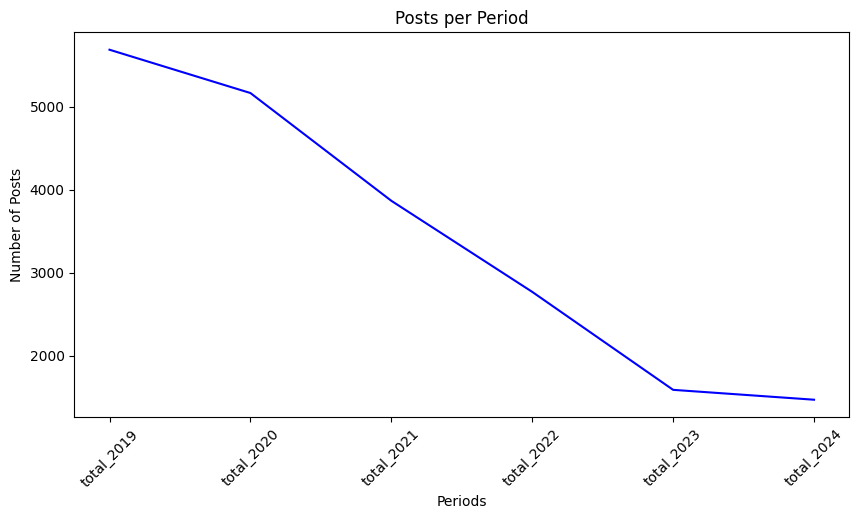

In [105]:
plot_dict = {
    'total_2019': len(total_2019['Id']),
    'total_2020': len(total_2020['Id']),
    'total_2021': len(total_2021['Id']),
    'total_2022': len(total_2022['Id']),
    'total_2023': len(total_2023['Id']),
    'total_2024': len(total_2024['Id'])
}

periods = list(plot_dict.keys())  # X-axis
posts_per_period = list(plot_dict.values())  # Y-axis

# Step 4: Create the line plot
plt.figure(figsize=(10, 5))  # Optional: Set the figure size
plt.plot(periods, posts_per_period, color='b')

# Step 5: Customize the plot
plt.title('Posts per Period')  # Title of the plot
plt.xlabel('Periods')  # X-axis label
plt.ylabel('Number of Posts')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.show()

In observing the graph above, we can see that the total number of machine learning questions has an overall downward tragectory. While the graph may indicate that machine learning was just a phase, we must remember that our original 'posts' dataset was only a section of the full wealth of data provided by Stack Exchange. At the beginning of the project, we downloaded the data from 2019 onwards to simplify our calculations. Now, we'll go back and download the complete timeline of data to repeat the same steps as above and compare the total number of posts that contain our top tags per year.

### Just a Phase? - Pt 2

In [106]:
# reading in the full dataset
all_posts = pd.read_csv("posts_all_time.csv")

In [107]:
all_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36590 entries, 0 to 36589
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             36590 non-null  int64  
 1   PostTypeId     36590 non-null  int64  
 2   CreationDate   36590 non-null  object 
 3   Score          36590 non-null  int64  
 4   ViewCount      36590 non-null  int64  
 5   Tags           36590 non-null  object 
 6   AnswerCount    36590 non-null  int64  
 7   FavoriteCount  0 non-null      float64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.2+ MB


In [108]:
all_posts

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,5,1,2014-05-13 23:58:30,9,988,<machine-learning>,1,NaN
1,7,1,2014-05-14 00:11:06,4,522,<education><open-source>,3,NaN
2,56014,1,2019-07-19 14:31:04,0,3988,<machine-learning><nlp><spacy>,1,NaN
3,56016,1,2019-07-19 14:52:35,1,233,<python><data><data-analysis><interpolation>,0,NaN
4,56017,1,2019-07-19 14:58:50,-1,38,<data>,1,NaN
...,...,...,...,...,...,...,...,...
36585,44327,1,2019-01-21 12:02:00,6,5716,<machine-learning><cross-validation><class-imb...,2,NaN
36586,44330,1,2019-01-21 13:08:09,0,4010,<machine-learning><deep-learning><training><im...,2,NaN
36587,44335,1,2019-01-21 16:00:49,1,470,<r><time-series><statistics>,1,NaN
36588,44336,1,2019-01-21 16:10:08,2,649,<machine-learning><neural-network><deep-learni...,1,NaN


In [109]:
all_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36590 entries, 0 to 36589
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             36590 non-null  int64  
 1   PostTypeId     36590 non-null  int64  
 2   CreationDate   36590 non-null  object 
 3   Score          36590 non-null  int64  
 4   ViewCount      36590 non-null  int64  
 5   Tags           36590 non-null  object 
 6   AnswerCount    36590 non-null  int64  
 7   FavoriteCount  0 non-null      float64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.2+ MB


In [110]:
# preparing dataset for analysis
all_posts['Tags'] = all_posts['Tags'].apply(clean)
all_posts['Tags'] = all_posts['Tags'].replace('nan', '0')

# correcting the null values
all_posts = all_posts.fillna(0)

# converting the CreationDate column to the proper data type
all_posts['CreationDate'] = pd.to_datetime(all_posts['CreationDate'])

all_posts = all_posts.sort_values(by='CreationDate', ascending=True)
all_posts = all_posts.reset_index(drop=True)

In [111]:
all_posts

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,5,1,2014-05-13 23:58:30,9,988,machine-learning,1,0.0
1,7,1,2014-05-14 00:11:06,4,522,"education,open-source",3,0.0
2,14,1,2014-05-14 01:25:59,26,1966,"data-mining,definitions",4,0.0
3,15,1,2014-05-14 01:41:23,2,661,databases,0,0.0
4,16,1,2014-05-14 01:57:56,17,447,"machine-learning,bigdata,libsvm",2,0.0
...,...,...,...,...,...,...,...,...
36585,131533,1,2025-03-08 02:11:18,0,10,"regression,statistics,categorical-data",0,0.0
36586,131534,1,2025-03-08 05:37:48,-1,7,text,0,0.0
36587,131535,1,2025-03-08 08:55:31,-1,23,data-analysis,0,0.0
36588,131536,1,2025-03-08 22:00:24,0,2,"machine-learning,r,clustering,xgboost,glm",0,0.0


In [112]:
all_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36590 entries, 0 to 36589
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             36590 non-null  int64         
 1   PostTypeId     36590 non-null  int64         
 2   CreationDate   36590 non-null  datetime64[ns]
 3   Score          36590 non-null  int64         
 4   ViewCount      36590 non-null  int64         
 5   Tags           36590 non-null  object        
 6   AnswerCount    36590 non-null  int64         
 7   FavoriteCount  36590 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.2+ MB


In [113]:
# creating a subdataframe by filtering the original dataframe
fad_check = all_posts[all_posts['Tags'] != '0']

rows_to_keep = []
for index, row in fad_check.iterrows():
    for top_tag in top_tags['Tag']:
        if top_tag in row['Tags']:
            rows_to_keep.append(index)

fad_check = fad_check.loc[rows_to_keep]        

fad_check = fad_check[['Id', 'CreationDate', 'Tags']]
fad_check = fad_check.drop_duplicates()

Now that the full timeline dataframe is ready, we will proceed with separating it into periods of one year each. Then, we will construct the same visualization we did before, but with our new data.

In [114]:
# splitting dataframe into one year periods
total_2014 = fad_check[(fad_check['CreationDate'] >= '2014-01-01') & (fad_check['CreationDate'] < '2015-01-01')]
total_2015 = fad_check[(fad_check['CreationDate'] >= '2015-01-01') & (fad_check['CreationDate'] < '2016-01-01')]
total_2016 = fad_check[(fad_check['CreationDate'] >= '2016-01-01') & (fad_check['CreationDate'] < '2017-01-01')]
total_2017 = fad_check[(fad_check['CreationDate'] >= '2017-01-01') & (fad_check['CreationDate'] < '2018-01-01')]
total_2018 = fad_check[(fad_check['CreationDate'] >= '2018-01-01') & (fad_check['CreationDate'] < '2019-01-01')]
total_2019 = fad_check[(fad_check['CreationDate'] >= '2019-01-01') & (fad_check['CreationDate'] < '2020-01-01')]
total_2020 = fad_check[(fad_check['CreationDate'] >= '2020-01-01') & (fad_check['CreationDate'] < '2021-01-01')]
total_2021 = fad_check[(fad_check['CreationDate'] >= '2021-01-01') & (fad_check['CreationDate'] < '2022-01-01')]
total_2022 = fad_check[(fad_check['CreationDate'] >= '2022-01-01') & (fad_check['CreationDate'] < '2023-01-01')]
total_2023 = fad_check[(fad_check['CreationDate'] >= '2023-01-01') & (fad_check['CreationDate'] < '2024-01-01')]
total_2024 = fad_check[(fad_check['CreationDate'] >= '2024-01-01') & (fad_check['CreationDate'] < '2025-01-01')]

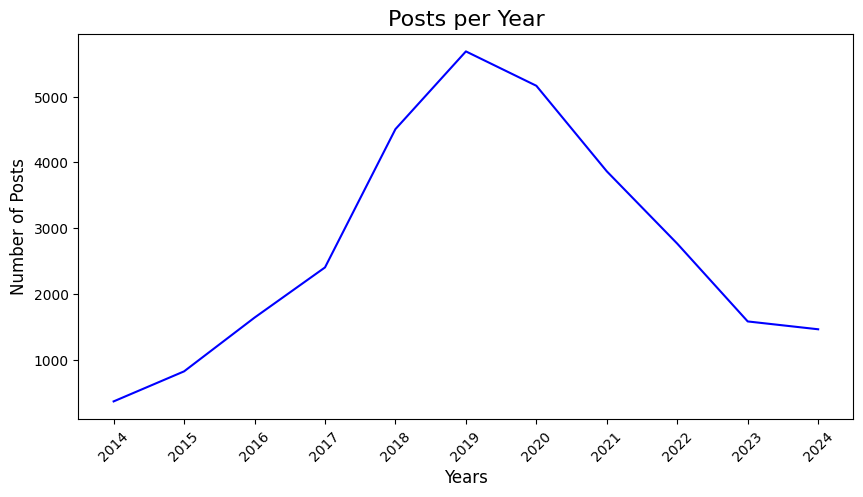

In [119]:
# visualizing total posts per year data
plot_dict = {
    '2014': len(total_2014['Id']),
    '2015': len(total_2015['Id']),
    '2016': len(total_2016['Id']),
    '2017': len(total_2017['Id']),
    '2018': len(total_2018['Id']),
    '2019': len(total_2019['Id']),
    '2020': len(total_2020['Id']),
    '2021': len(total_2021['Id']),
    '2022': len(total_2022['Id']),
    '2023': len(total_2023['Id']),
    '2024': len(total_2024['Id'])
}

years = list(plot_dict.keys())  # X-axis
post_totals = list(plot_dict.values())  # Y-axis

# Step 4: Create the line plot
plt.figure(figsize=(10, 5)) 
plt.plot(years, post_totals, color='b')

# Step 5: Customize the plot
plt.title('Posts per Year', fontsize=16)  # Title of the plot
plt.xlabel('Years', fontsize=12)  # X-axis label
plt.ylabel('Number of Posts', fontsize=12)  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels

plt.show()

### Observations and Recommendations
From our final graph above, we conclude that while there was a decreasing period between 2019 and 2023, the overall trend of the graph is positive. We also did not include the 2025 data in this graph because there is not a full year's worth of data for 2025 to add another complete year to this graph. With the general trend in the graph being positive, it is safe to say that a question related to machine learning would be the popular choice on Data Science Stack Exchange.

### Conclusion
Throughout this project, we have analyzed Data Science Stack Exchange data in order to provide our professional recommendation on the most popular Data Science question or topic. Using for loops, we were able to filter our data to find the top tags in the dataframe. Once we had our top tags, we determined their domain and what they all had in common. We found that they were all related to machine learning. Lastly, to confirm our results, we looked at the number of machine learning questions over different periods of time to ensure that the popularity of machine learning wasn't just a phase. Once machine learning was confirmed as popular, we recommended machine learning Data Science questions as our professional recommendation for the most popular Data Science question.

##### Citations
###### - "About Stack Exchange." Stack Exchange, n.d. Web. 5 Oct. 2023. https://stackexchange.com/about.